<a href="https://colab.research.google.com/github/HYLee810/projectmanager/blob/main/Tensorflow_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf

In [3]:
(x_train, y_train), (x_test, y_test) = \
    tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
from PIL import Image
Image.fromarray(x_train[0])  # 훈련용 이미지 0번을 그림으로 보기

In [5]:
y_train[0]  # 훈련용 이미지 0번의 숫자

5

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
import numpy as np
def filter_dataset(x, y, neg_cls, pos_cls):
    # x와 y에서 neg_cls와 pos_cls만 추려내는 함수
    m = (y == pos_cls) | (y == neg_cls)
    x = x[m]
    y = y[m]
    y = np.where(y == neg_cls, 0, 1)
    return x, y

x_train2, y_train2 = filter_dataset(x_train, y_train, 0, 1)

In [9]:
y_train2

array([0, 1, 1, ..., 1, 0, 1])

In [10]:
Image.fromarray(x_train2[1])

In [12]:
from tensorflow.keras.layers import *
model = tf.keras.Sequential([
    Flatten(), # 받은 이미지를 한줄로
    Dense(1, activation='sigmoid'), # 한줄로 받은 이미지 한셀 한셀에 가중치를 더하기
])

In [13]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
result = model.fit(x_train2, y_train2, validation_split=0.1, epochs=10) # loss가 줄어들면서 정확도가 높아지고 있음

Epoch 1/10
357/357 [==============================] - 1s 1ms/step - loss: 0.4937 - accuracy: 0.9876 - val_loss: 0.0131 - val_accuracy: 0.9992
Epoch 2/10
357/357 [==============================] - 0s 1ms/step - loss: 0.0964 - accuracy: 0.9978 - val_loss: 0.0473 - val_accuracy: 0.9984
Epoch 3/10
357/357 [==============================] - 0s 1ms/step - loss: 0.0658 - accuracy: 0.9980 - val_loss: 0.0081 - val_accuracy: 0.9992
Epoch 4/10
357/357 [==============================] - 0s 1ms/step - loss: 0.0574 - accuracy: 0.9987 - val_loss: 4.9865e-15 - val_accuracy: 1.0000
Epoch 5/10
357/357 [==============================] - 0s 1ms/step - loss: 0.0520 - accuracy: 0.9985 - val_loss: 1.7937e-11 - val_accuracy: 1.0000
Epoch 6/10
357/357 [==============================] - 0s 1ms/step - loss: 0.0273 - accuracy: 0.9990 - val_loss: 0.0079 - val_accuracy: 0.9992
Epoch 7/10
357/357 [==============================] - 0s 1ms/step - loss: 0.0374 - accuracy: 0.9986 - val_loss: 5.0516e-11 - val_accuracy: 1

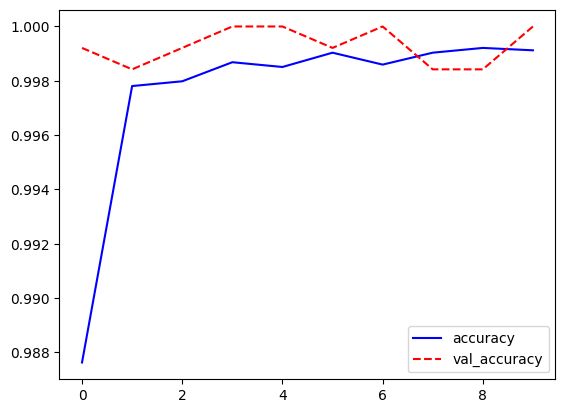

In [14]:
import matplotlib.pyplot as plt
plt.plot(result.history['accuracy'], 'b-', label='accuracy')
plt.plot(result.history['val_accuracy'], 'r--', label='val_accuracy')
plt.legend()

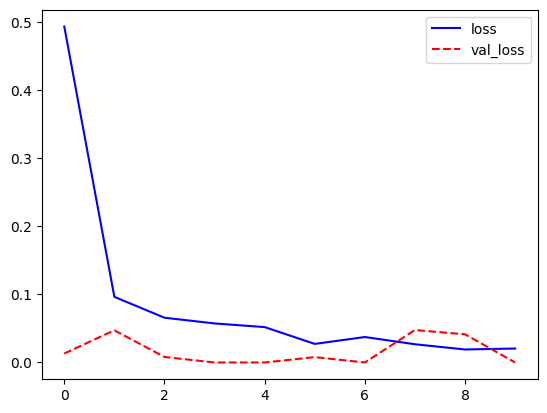

In [15]:
plt.plot(result.history['loss'], 'b-', label='loss')
plt.plot(result.history['val_loss'], 'r--', label='val_loss')
plt.legend()

## epochs를 무작정 많이 한다고 정확도가 높아지는 것은 아님!
중간중간 저장을 해놨다가 제일 성능이 좋았던 시점을 다시 불러온다.

Early Stopping: 100번을 하기로 했어도 성능이 떨어지기 시작하면 일찍 멈춤
Checkpoint: 중간중간 저장을 해놨다가 제일 성능이 좋았던 시점을 다시 불러온다

복잡도: 얼마나 복잡하냐(모델의 특성)
정확도: 얼마나 잘 맞췄냐(결과)   
 - 단순해야 할 때는 단순하게
 - 복잡해야 할 때는 복잡하게